In [8]:
import numpy as np
import matplotlib.pyplot as plt
from M1S_tools import *

plt.jet()

## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

## which SAs have IM disabled in the thermal analysis?

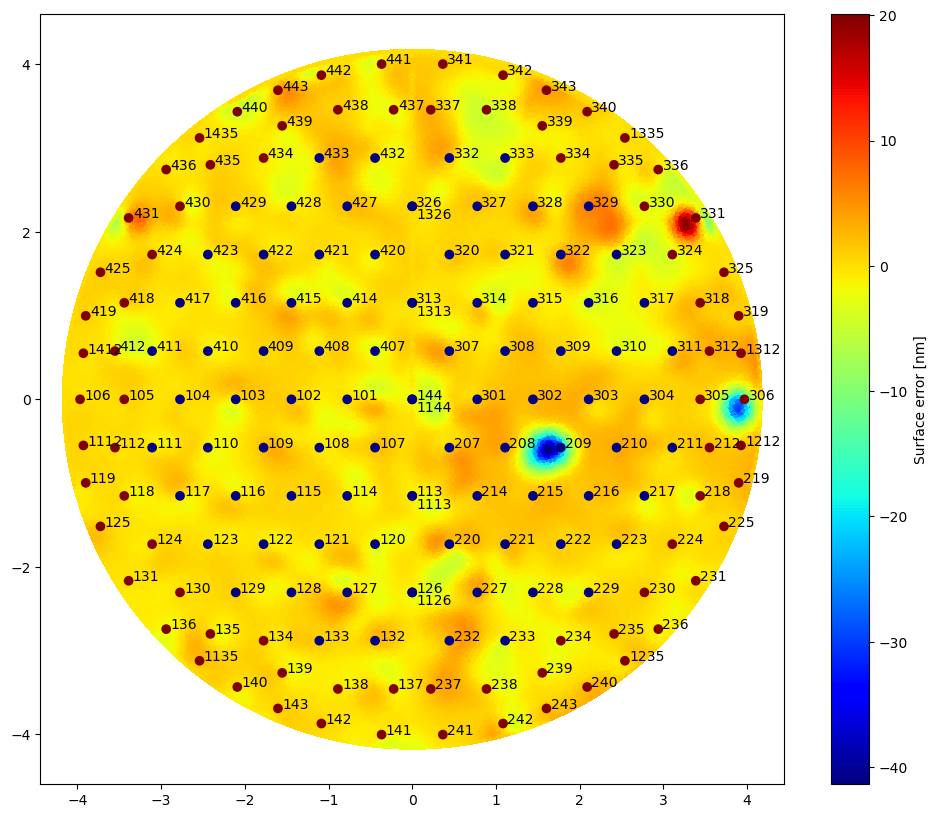

In [12]:
data = np.load("../Data/m1testcell/print-through/outer.pkl",allow_pickle=True)
nodex = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s = np.asarray(data["field"])

data = np.load("../Data/m1testcell/cold-spot_single/outer.pkl",allow_pickle=True)
nodex1 = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey1 = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s1 = np.asarray(data["field"])

data = np.load("../Data/m1testcell/cold-spot_triple/outer.pkl",allow_pickle=True)
nodex2 = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey2 = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s2 = np.asarray(data["field"])

fig, ax = plt.subplots(1,1,figsize=(12,10))

plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,(s2-s+s1-s)*1e9)
plt.colorbar(label="Surface error [nm]")
plt.axis('equal');

plt.scatter(sax, say, c=saz)
for i in range(len(sax)):
    if (np.any(abs(sax[i]+say[i]-sax[:i]-say[:i])<1e-4)):
        plt.text(sax[i]+.05, say[i]-0.15, str(saID[i]))
    else:
        plt.text(sax[i]+.05, say[i], str(saID[i]))

## The K-matrix is going to balance out the net forces and moments, in a way that minimizes the mirror bending.

We don't yet have the truncated K-matrix. Here we assume the minimization of the bending is realized by subtracting a certain number of bending modes.

In [17]:
IF_ml = Afn_ml @ fv_ml

44 209 161
82 306 101


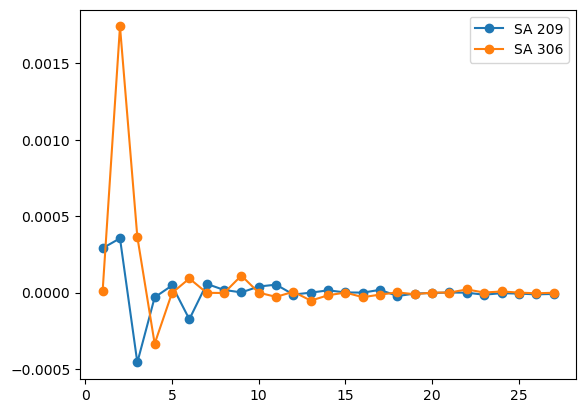

In [21]:
for modeID in range(1,nact+1):
    if saID[modeID-1] in [209, 306]:
        modeID_ml = np.where(saID_ml == saID[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
        print(modeID, saID[modeID-1], modeID_ml)
        
        #IF_ml is in nanometer. bending modes have been converted into microns
        aa = UMat_ml.transpose() /UMat_ml.shape[0] @ (IF_ml[:,modeID_ml-1]*1e-3)
        
        plt.plot(np.arange(1,27+1), aa[:27],'-o', label='SA %d'%saID_ml[modeID_ml-1])
        
plt.legend();

44 209 161
82 306 101


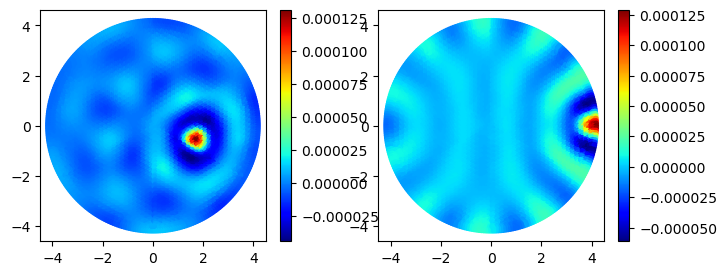

In [26]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

modes_to_correct = 46
i = 0
for modeID in range(1,nact+1):
    if saID[modeID-1] in [209, 306]:
        modeID_ml = np.where(saID_ml == saID[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
        print(modeID, saID[modeID-1], modeID_ml)
        
        #IF_ml is in nanometer. bending modes have been converted into microns
        aa = UMat_ml.transpose() /UMat_ml.shape[0] @ (IF_ml[:,modeID_ml-1]*1e-3)
        residual = IF_ml[:,modeID_ml-1]*1e-3 - UMat_ml[:,:modes_to_correct] @ aa[:modes_to_correct]
        
        #img = ax[i].scatter(nodex_ml, nodey_ml, 10, c=IF_ml[:,modeID_ml-1]*1e-3 ) #in micron
        img = ax[i].scatter(nodex_ml, nodey_ml, 10, c=residual ) #in micron        
        fig.colorbar(img, ax=ax[i])
        ax[i].axis('equal')
        i+=1

### figure out the optimal forces (we use Steve's force as the approximate here)

In [30]:
dataFolder = './'
df = pd.read_excel(dataFolder+'gmt3_final_forces_english.xlsx', skiprows=2)
nact_sw = len(df)
print('Number of actuators = ', nact_sw)

lbs2N = 4.4482216153
f_corr = np.array(df['gmto_zfrc (lbs)'])*lbs2N

Number of actuators =  170


In [31]:
initialF = []
initialF_ID = []
for modeID_sw in range(1,nact_sw+1):
    if saID_sw[modeID_sw-1] in [209, 306]:
        initialF_ID.append(saID_sw[modeID_sw-1])
        initialF.append(f_corr[modeID_sw-1])
print(initialF_ID)
print(initialF)

[306.0, 209.0]
[858.0371403614389, 995.7095811401362]


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,3))

modes_to_correct = 46
i = 0
for modeID in range(1,nact+1):
    if saID[modeID-1] in [209, 306]:
        modeID_ml = np.where(saID_ml == saID[modeID-1])[0][0]+1 #we want modeID_ml to start from 1 as well
        print(modeID, saID[modeID-1], modeID_ml)
        
        #IF_ml is in nanometer. bending modes have been converted into microns
        aa = UMat_ml.transpose() /UMat_ml.shape[0] @ (IF_ml[:,modeID_ml-1]*1e-3)
        residual = IF_ml[:,modeID_ml-1]*1e-3 - UMat_ml[:,:modes_to_correct] @ aa[:modes_to_correct]
        
        #img = ax[i].scatter(nodex_ml, nodey_ml, 10, c=IF_ml[:,modeID_ml-1]*1e-3 ) #in micron
        img = ax[i].scatter(nodex_ml, nodey_ml, 10, c=residual ) #in micron        
        fig.colorbar(img, ax=ax[i])
        ax[i].axis('equal')
        i+=1